In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

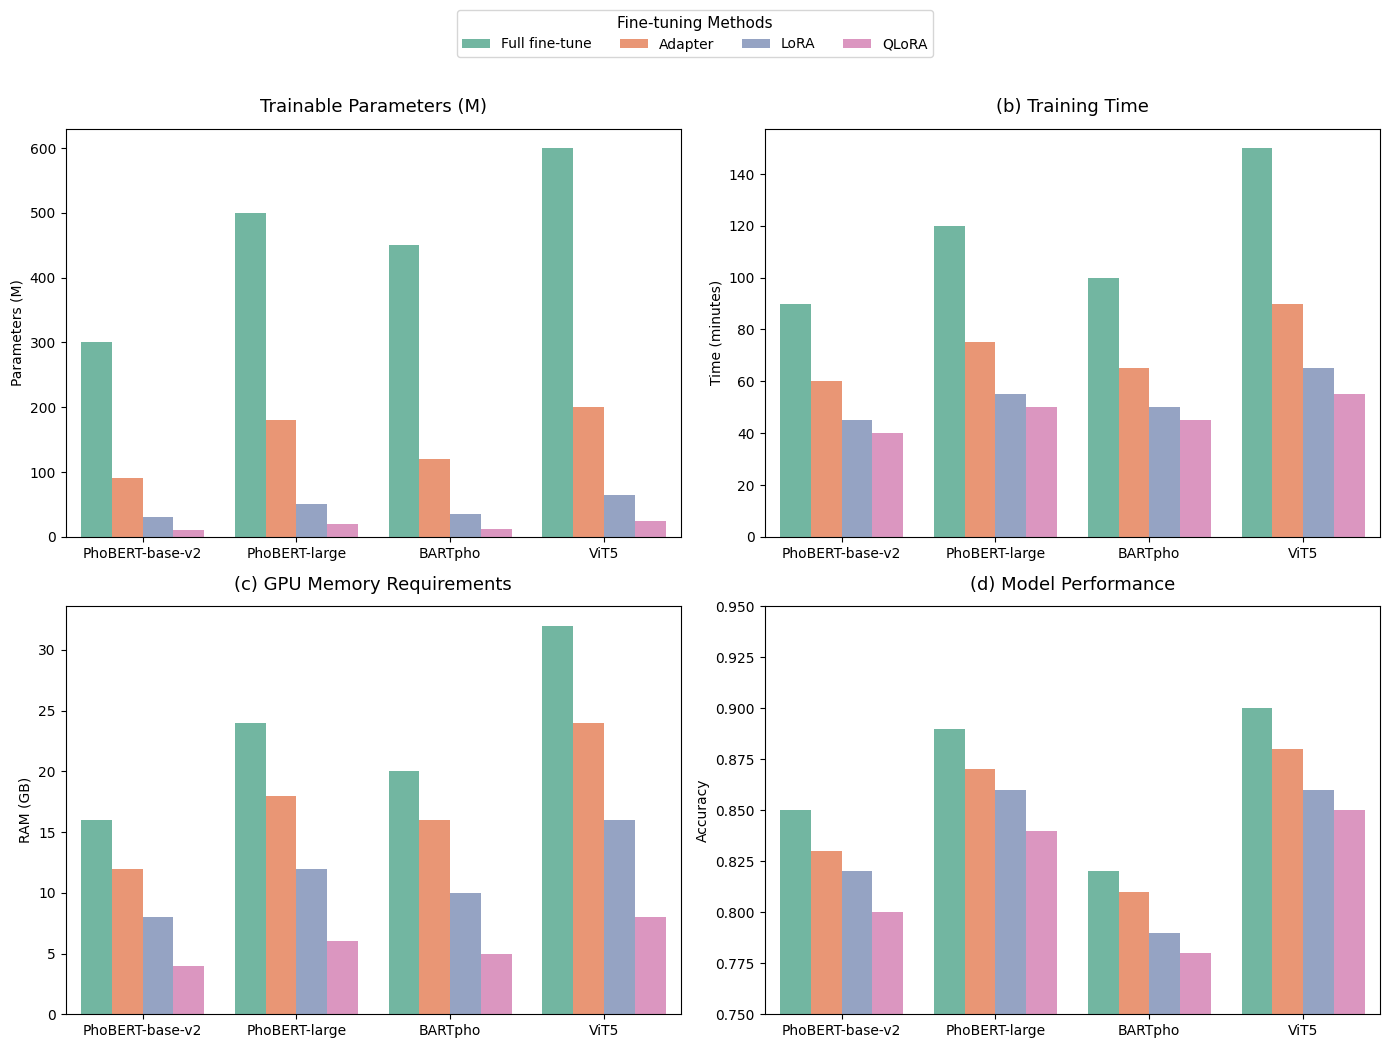

In [ ]:
# Define models and fine-tuning techniques
models = ['PhoBERT-base-v2', 'PhoBERT-large', 'BARTpho', 'ViT5']
techniques = ['Full fine-tune', 'Adapter', 'LoRA', 'QLoRA']

# Create figure with 2 rows, 2 columns (total 4 subplots)
fig, axs = plt.subplots(2, 2, figsize=(14, 10), dpi=100)
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easier indexing
palette = sns.color_palette("Set2", len(techniques))

# 1. Trainable Parameters (Millions)
param_values = np.array([
    [300, 90, 30, 10],  # PhoBERT-base-v2
    [500, 180, 50, 20],  # PhoBERT-large
    [450, 120, 35, 12],  # BARTpho
    [600, 200, 65, 25]   # ViT5
])

param_df = pd.DataFrame({
    'Model': np.repeat(models, len(techniques)),
    'Technique': np.tile(techniques, len(models)),
    'Value': param_values.flatten()
})

sns.barplot(x='Model', y='Value', hue='Technique', data=param_df, ax=axs[0], palette=palette)
axs[0].set_title('(a) Trainable Parameters', fontsize=13, pad=12)
axs[0].set_xlabel('')
axs[0].set_ylabel('Parameters (M)', fontsize=10)

# 2. Training Time
time_values = np.array([
    [90, 60, 45, 40],  # PhoBERT-base-v2
    [120, 75, 55, 50],  # PhoBERT-large
    [100, 65, 50, 45],  # BARTpho
    [150, 90, 65, 55]   # ViT5
])

time_df = pd.DataFrame({
    'Model': np.repeat(models, len(techniques)),
    'Technique': np.tile(techniques, len(models)),
    'Value': time_values.flatten()
})

sns.barplot(x='Model', y='Value', hue='Technique', data=time_df, ax=axs[1], palette=palette)
axs[1].set_title('(b) Training Time', fontsize=13, pad=12)
axs[1].set_xlabel('')
axs[1].set_ylabel('Time (minutes)', fontsize=10)

# 3. GPU Memory Requirements
ram_values = np.array([
    [16, 12, 8, 4],  # PhoBERT-base-v2
    [24, 18, 12, 6],  # PhoBERT-large
    [20, 16, 10, 5],  # BARTpho
    [32, 24, 16, 8]   # ViT5
])

ram_df = pd.DataFrame({
    'Model': np.repeat(models, len(techniques)),
    'Technique': np.tile(techniques, len(models)),
    'Value': ram_values.flatten()
})

sns.barplot(x='Model', y='Value', hue='Technique', data=ram_df, ax=axs[2], palette=palette)
axs[2].set_title('(c) GPU Memory Requirements', fontsize=13, pad=12)
axs[2].set_xlabel('')
axs[2].set_ylabel('RAM (GB)', fontsize=10)

# 4. Model Performance
accuracy_values = np.array([
    [0.85, 0.83, 0.82, 0.80],  # PhoBERT-base-v2
    [0.89, 0.87, 0.86, 0.84],  # PhoBERT-large
    [0.82, 0.81, 0.79, 0.78],  # BARTpho
    [0.90, 0.88, 0.86, 0.85]   # ViT5
])

accuracy_df = pd.DataFrame({
    'Model': np.repeat(models, len(techniques)),
    'Technique': np.tile(techniques, len(models)),
    'Value': accuracy_values.flatten()
})

sns.barplot(x='Model', y='Value', hue='Technique', data=accuracy_df, ax=axs[3], palette=palette)
axs[3].set_title('(d) Model Performance', fontsize=13, pad=12)
axs[3].set_xlabel('')
axs[3].set_ylabel('Accuracy', fontsize=10)
axs[3].set_ylim(0.75, 0.95)

# Formatting
for i in range(4):
    axs[i].get_legend().remove() 

# Add a single legend for the entire figure
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title='Fine-tuning Methods',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=4,  # Number of columns in legend
    frameon=True,
    fontsize=10,
    title_fontsize=11
)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to make room for the legend
plt.show()